# 서울시 cctv 및 인구수 데이터

In [2]:
import pandas as pd
import numpy as np

#시각화 패키지

import matplotlib.pyplot as plt

#시각화 시 한글 출력을 위한 import
import platform
from matplotlib import font_manager, rc

## 데이터 읽어오기

In [3]:
cctv = pd.read_excel("C:/Users/USER/Desktop/coding/0811/data/cctv.xlsx")
print(cctv)

        기관명    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0     강 남 구  5221    1944.0  195.0  316.0    430    546    765    577    448
1     강 동 구  1879     303.0  387.0  134.0     59    144    194    273    385
2     강 북 구  1265     243.0   88.0  141.0     74    145    254      1    319
3     강 서 구  1617     219.0  155.0  118.0    230    187    190    264    254
4     관 악 구  3985     430.0   56.0  419.0    487    609    619    694    671
5     광 진 구  1581     470.0   42.0   83.0     87     64     21    468    346
6     구 로 구  3227     852.0  219.0  349.0    187    268    326    540    486
7     금 천 구  1634      27.0   17.0  242.0    101    382    136    199    530
8     노 원 구  1906     481.0  117.0  203.0     80    461    298    110    156
9     도 봉 구   858     197.0   66.0    8.0    185     59    155    117     71
10     동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197
11    동 작 구  1780     238.0   93.0   29.0    503    130    254    278    255

In [18]:
#pop.txt 의 첫 두개의 열은 의미가 없으며, 한글을 포함, 구분 기호는 탭이며 천 단위 구분 기호가 존재 함.

pop = pd.read_csv("C:/Users/USER/Desktop/coding/0811/data/pop.txt", skiprows=2, delimiter="\t", thousands=",")
print(pop.head())
print(pop.info())

         기간  자치구       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9077    4024    5053   1.99     27605  
2    62997    9243    4507    4736   1.96     23980  
3   117430   14287    7910    6377   2.03     38884  
4   148120    6605    2885    3720   2.15     45591  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        26 non-null     object 
 1   자치구   

In [19]:
cctv.rename(columns={cctv.columns[0]:'구별'}, inplace=True)
pop.rename(columns={pop.columns[1]:'구별'}, inplace=True)

#cctv의 구이름에는 중간에 공백이 존재, pop은 구 이름에는 공백이 없음
gu = []
for x in cctv['구별'] :
    gu.append(x.replace(' ',''))
    
cctv['구별'] = gu

cctv
## 공백 제거 완료

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71


In [20]:
pop

,기간,구별,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
1,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591
5,2021.2/4,광진구,166957,355306,170624,184682,342481,165233,177248,12825,5391,7434,2.05,50815
6,2021.2/4,동대문구,166372,352259,172865,179394,338040,167335,170705,14219,5530,8689,2.03,61262
7,2021.2/4,중랑구,185073,394679,194556,200123,389972,192688,197284,4707,1868,2839,2.11,70172
8,2021.2/4,성북구,194364,443206,212849,230357,433658,209210,224448,9548,3639,5909,2.23,73568
9,2021.2/4,강북구,144525,306093,148824,157269,302645,147542,155103,3448,1282,2166,2.09,63383


# 불필요한 열과 행 정리

In [21]:
#pop 데이터에서 기간, 구별, 계, 남자, 여자 열만 필요
pop = pop[["기간", '구별', '계', '남자', '여자']]


#pop 데이터의 첫번째 행은 전체 데이터의 집계이므로, 불필요
pop.drop([0], inplace=True)


# 새로운 열을 추가 - 없는 열 이름에 데이터를 대입하면 됩니다.
pop['여성비율'] = pop['여자']/pop['계'] * 100

print(pop)

          기간    구별       계      남자      여자       여성비율
1   2021.2/4   종로구  155106   75009   80097  51.640169
2   2021.2/4    중구  132259   64526   67733  51.212394
3   2021.2/4   용산구  240665  116858  123807  51.443708
4   2021.2/4   성동구  295767  143927  151840  51.337708
5   2021.2/4   광진구  355306  170624  184682  51.978295
6   2021.2/4  동대문구  352259  172865  179394  50.926733
7   2021.2/4   중랑구  394679  194556  200123  50.705257
8   2021.2/4   성북구  443206  212849  230357  51.975154
9   2021.2/4   강북구  306093  148824  157269  51.379483
10  2021.2/4   도봉구  322419  156843  165576  51.354294
11  2021.2/4   노원구  520005  250532  269473  51.821232
12  2021.2/4   은평구  479409  229241  250168  52.182583
13  2021.2/4  서대문구  317699  150608  167091  52.594122
14  2021.2/4   마포구  379984  177998  201986  53.156449
15  2021.2/4   양천구  454288  222538  231750  51.013894
16  2021.2/4   강서구  582995  280822  302173  51.831148
17  2021.2/4   구로구  424582  210936  213646  50.319137
18  2021.2/4   금천구  244685  

C:\Users\USER\AppData\Local\Temp\ipykernel_30364\2346758573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop.drop([0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_30364\2346758573.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['여성비율'] = pop['여자']/pop['계'] * 100


In [ ]:
# 데이터 결합

In [22]:
df = pd.merge(cctv, pop, on='구별')
print(df)

      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   

### 불필요한 열 삭제

In [26]:
#2011년 이전, 2012년, 2013년, 2014년, 2015년, 2016년, 2017년, 기간 열을 삭제
#del을 이용 - pandas에서는 비추천

del df['2011년 이전']
del df['2012년']
del df['2013년']
del df['2014년']
del df['2015년']
del df['2016년']
del df['2017년']
del df['기간']

print(df)

      구별    소계  2018년       계      남자      여자       여성비율
0    강남구  5221    448  536107  256449  279658  52.164587
1    강동구  1879    385  469094  230388  238706  50.886603
2    강북구  1265    319  306093  148824  157269  51.379483
3    강서구  1617    254  582995  280822  302173  51.831148
4    관악구  3985    671  502698  251713  250985  49.927591
5    광진구  1581    346  355306  170624  184682  51.978295
6    구로구  3227    486  424582  210936  213646  50.319137
7    금천구  1634    530  244685  124394  120291  49.161575
8    노원구  1906    156  520005  250532  269473  51.821232
9    도봉구   858     71  322419  156843  165576  51.354294
10  동대문구  2003    197  352259  172865  179394  50.926733
11   동작구  1780    255  397231  191657  205574  51.751751
12   마포구  1935    195  379984  177998  201986  53.156449
13  서대문구  2121    194  317699  150608  167091  52.594122
14   서초구  2835    396  422174  202027  220147  52.146035
15   성동구  2679    294  295767  143927  151840  51.337708
16   성북구  3003    643  443206  

In [28]:
df.set_index('구별', inplace=True)

print(df)

        소계  2018년       계      남자      여자       여성비율
구별                                                  
강남구   5221    448  536107  256449  279658  52.164587
강동구   1879    385  469094  230388  238706  50.886603
강북구   1265    319  306093  148824  157269  51.379483
강서구   1617    254  582995  280822  302173  51.831148
관악구   3985    671  502698  251713  250985  49.927591
광진구   1581    346  355306  170624  184682  51.978295
구로구   3227    486  424582  210936  213646  50.319137
금천구   1634    530  244685  124394  120291  49.161575
노원구   1906    156  520005  250532  269473  51.821232
도봉구    858     71  322419  156843  165576  51.354294
동대문구  2003    197  352259  172865  179394  50.926733
동작구   1780    255  397231  191657  205574  51.751751
마포구   1935    195  379984  177998  201986  53.156449
서대문구  2121    194  317699  150608  167091  52.594122
서초구   2835    396  422174  202027  220147  52.146035
성동구   2679    294  295767  143927  151840  51.337708
성북구   3003    643  443206  212849  230357  51.

In [44]:
#지원 하지 않는 글꼴 -> 글자체 변경, 
if platform.system() == 'Darwin' :
    rc('font', family=Applemano)
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

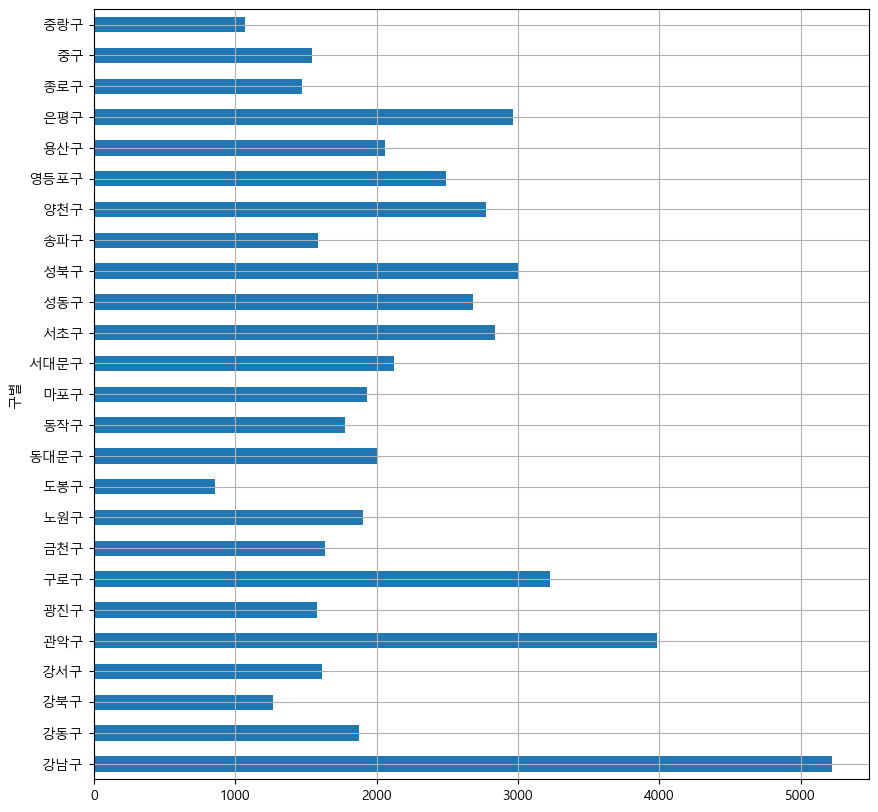

In [45]:
df['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

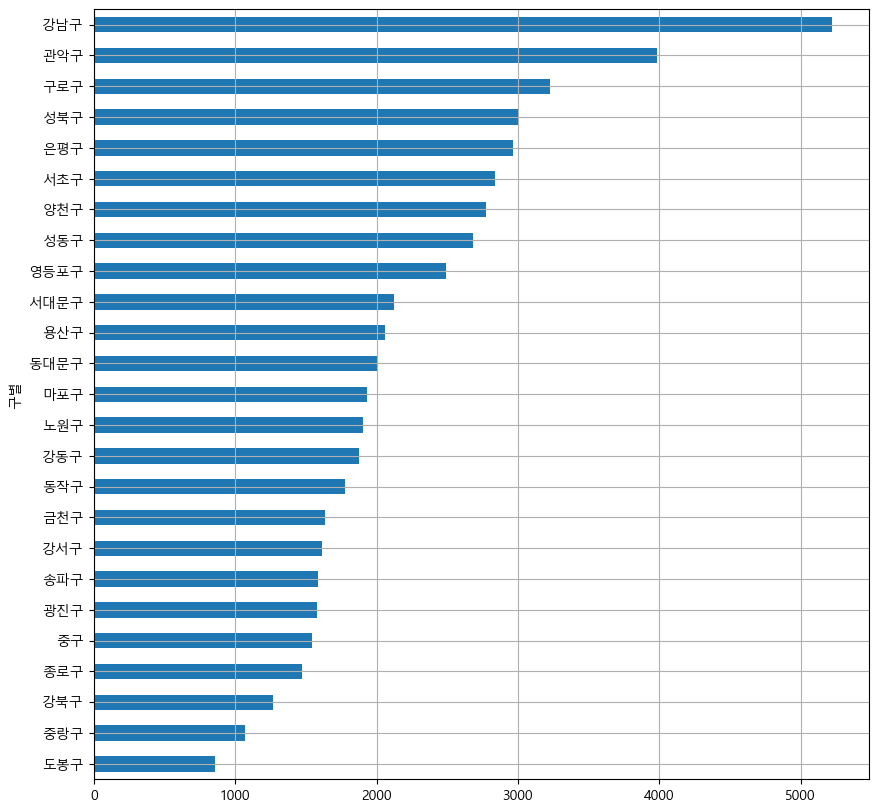

In [46]:
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

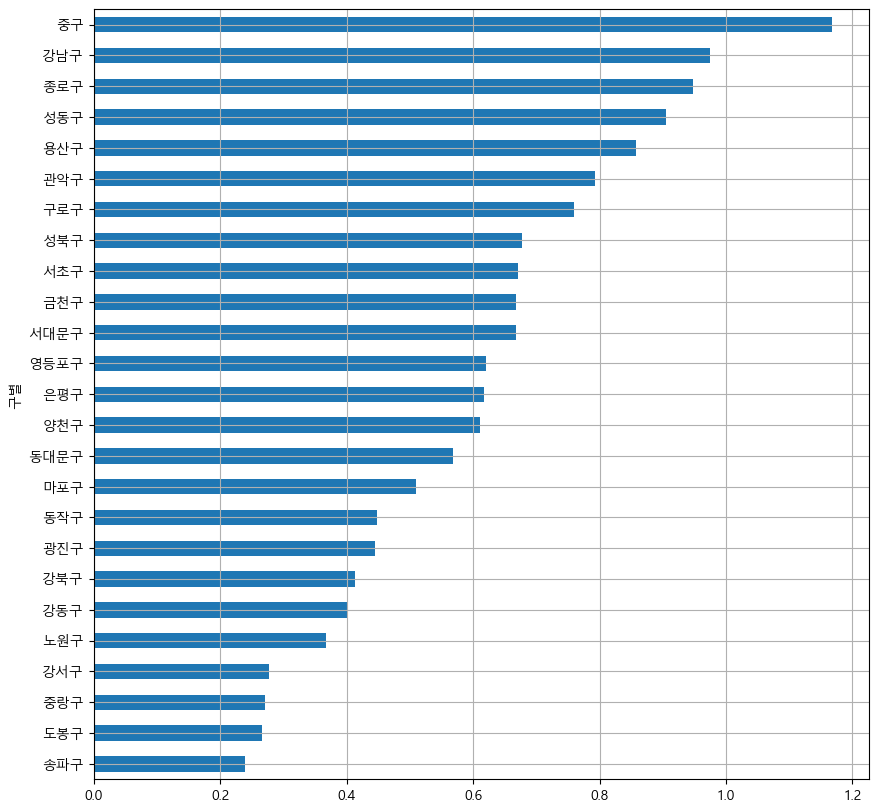

In [47]:
df['cctv 비율'] = df['소계']/df['계'] * 100
df['cctv 비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

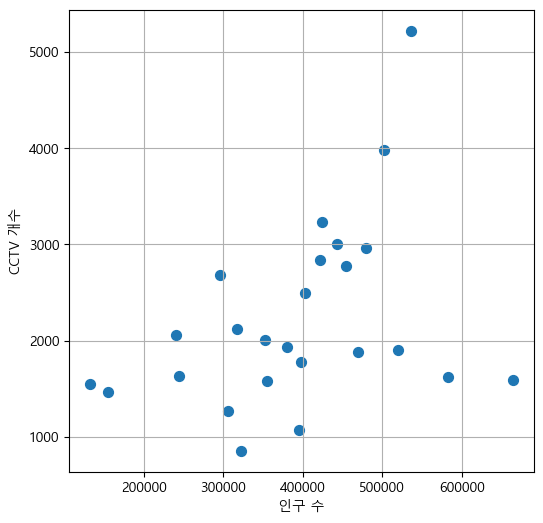

In [48]:
plt.figure(figsize=(6, 6))
plt.scatter(df['계'], df['소계'], s=50)
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()
#산점도(산포도)를 그리는 경우에는 방향성과 그룹화 가능성을 확인합니다.

 
0.002892 x + 1087


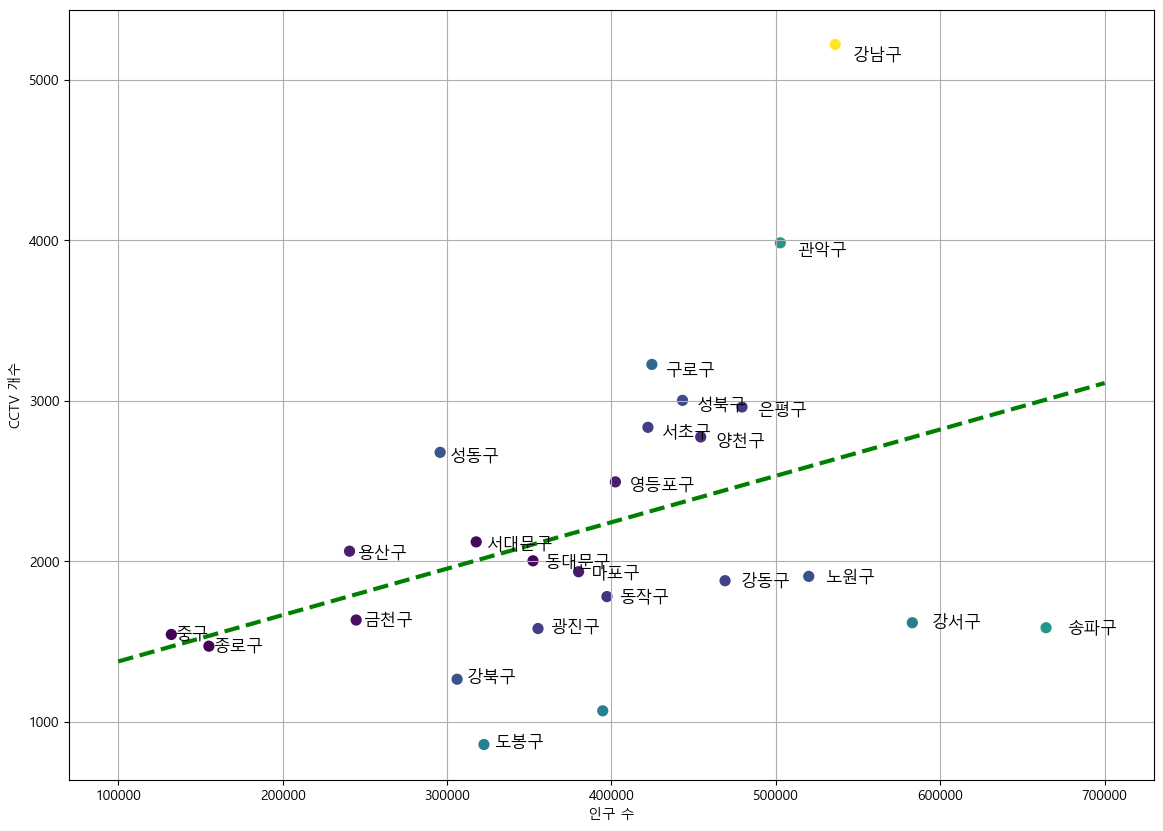

In [55]:
#2개 항목의 단항식을 구하기
fp1 = np.polyfit(df['계'],df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)


#산점도와 단항식을 같이 출력

fx = np.linspace(100000, 700000, 100)

df['오차'] = np.abs(df['소계'] - f1(df['계']))

plt.figure(figsize=(14, 10))
plt.scatter(df['계'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

#좌표를 지정해서 레이블을 출력
for i in range(24):
    plt.text(df['계'][i] * 1.02, df['소계'][i] * 0.98, df.index[i], fontsize=12)

plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

In [57]:
#멀티 인덱스로 사용할 데이터 생성
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2015'), ('cust_1', '2016'), ('cust_2', '2015'),('cust_2', '2016')])


data = pd.DataFrame(data =np.arange(16).reshape(4, 4),
                   index=mul_index, columns=['prd_1', 'prd_2', 'prd_3', 'prd_4'],
                   dtype='int')

print(data)

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15


In [58]:
data_stacked = data.stack()

print(data_stacked)

cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32


In [59]:
data.loc['cust_2', 'prd_4'] = np.nan
print(data)

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2    3.0
       2016      4      5      6    7.0
cust_2 2015      8      9     10    NaN
       2016     12     13     14    NaN


In [60]:
data_stacked = data.stack(dropna=False)
print(data_stacked)

cust_1  2015  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2016  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2015  prd_1     8.0
              prd_2     9.0
              prd_3    10.0
              prd_4     NaN
        2016  prd_1    12.0
              prd_2    13.0
              prd_3    14.0
              prd_4     NaN
dtype: float64


In [61]:
print(data_stacked.unstack(level=0))

            cust_1  cust_2
2015 prd_1     0.0     8.0
     prd_2     1.0     9.0
     prd_3     2.0    10.0
     prd_4     3.0     NaN
2016 prd_1     4.0    12.0
     prd_2     5.0    13.0
     prd_3     6.0    14.0
     prd_4     7.0     NaN


In [64]:
data = pd.read_csv('../0811/data/macrodata.csv')
print(data.head())

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


In [65]:
#시계열 인덱스 생성
periods = pd.PeriodIndex(year=data['year'], quarter=data['quarter'], name='data')
print(periods)

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='data', length=203)


In [66]:
columns = pd.Index(['realgdp', 'infi', 'unemp'], name='item')

data = data.reindex(columns = columns)
print(data)

item    realgdp  infi  unemp
0      2710.349   NaN    5.8
1      2778.801   NaN    5.1
2      2775.488   NaN    5.3
3      2785.204   NaN    5.6
4      2847.699   NaN    5.2
..          ...   ...    ...
198   13324.600   NaN    6.0
199   13141.920   NaN    6.9
200   12925.410   NaN    8.1
201   12901.504   NaN    9.2
202   12990.341   NaN    9.6

[203 rows x 3 columns]


In [67]:
#인덱스에 날짜를 설정
data.index = periods.to_timestamp('D', 'end') # 쿼터의 마지막 날을 세부 데이터로 설정
print(data)

item                             realgdp  infi  unemp
data                                                 
1959-03-31 23:59:59.999999999   2710.349   NaN    5.8
1959-06-30 23:59:59.999999999   2778.801   NaN    5.1
1959-09-30 23:59:59.999999999   2775.488   NaN    5.3
1959-12-31 23:59:59.999999999   2785.204   NaN    5.6
1960-03-31 23:59:59.999999999   2847.699   NaN    5.2
...                                  ...   ...    ...
2008-09-30 23:59:59.999999999  13324.600   NaN    6.0
2008-12-31 23:59:59.999999999  13141.920   NaN    6.9
2009-03-31 23:59:59.999999999  12925.410   NaN    8.1
2009-06-30 23:59:59.999999999  12901.504   NaN    9.2
2009-09-30 23:59:59.999999999  12990.341   NaN    9.6

[203 rows x 3 columns]


In [69]:
#날짜를 데이터로 사용
idata = data.stack().reset_index().rename(columns={0:'value'})
print(idata)

                             data     item      value
0   1959-03-31 23:59:59.999999999  realgdp   2710.349
1   1959-03-31 23:59:59.999999999    unemp      5.800
2   1959-06-30 23:59:59.999999999  realgdp   2778.801
3   1959-06-30 23:59:59.999999999    unemp      5.100
4   1959-09-30 23:59:59.999999999  realgdp   2775.488
..                            ...      ...        ...
401 2009-03-31 23:59:59.999999999    unemp      8.100
402 2009-06-30 23:59:59.999999999  realgdp  12901.504
403 2009-06-30 23:59:59.999999999    unemp      9.200
404 2009-09-30 23:59:59.999999999  realgdp  12990.341
405 2009-09-30 23:59:59.999999999    unemp      9.600

[406 rows x 3 columns]


In [70]:
pivoted = idata.pivot('data', 'item', 'value')
print(pivoted)

item                             realgdp  unemp
data                                           
1959-03-31 23:59:59.999999999   2710.349    5.8
1959-06-30 23:59:59.999999999   2778.801    5.1
1959-09-30 23:59:59.999999999   2775.488    5.3
1959-12-31 23:59:59.999999999   2785.204    5.6
1960-03-31 23:59:59.999999999   2847.699    5.2
...                                  ...    ...
2008-09-30 23:59:59.999999999  13324.600    6.0
2008-12-31 23:59:59.999999999  13141.920    6.9
2009-03-31 23:59:59.999999999  12925.410    8.1
2009-06-30 23:59:59.999999999  12901.504    9.2
2009-09-30 23:59:59.999999999  12990.341    9.6

[203 rows x 2 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_30364\1991625256.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = idata.pivot('data', 'item', 'value')


In [72]:
data = pd.DataFrame({"cust_id":[1,2,3,4], "prod_id":["A", "B", "C", "D"],
                     "pch_cnt":[1,2,3,4], "pch_price":[100,200,300,400],
                    "pch_amt":[10,20,30,40]})

result = pd.melt(data, id_vars=["cust_id", "prod_id"])
print(result)

    cust_id prod_id   variable  value
0         1       A    pch_cnt      1
1         2       B    pch_cnt      2
2         3       C    pch_cnt      3
3         4       D    pch_cnt      4
4         1       A  pch_price    100
5         2       B  pch_price    200
6         3       C  pch_price    300
7         4       D  pch_price    400
8         1       A    pch_amt     10
9         2       B    pch_amt     20
10        3       C    pch_amt     30
11        4       D    pch_amt     40


In [75]:
data = pd.DataFrame({"id": ["id1", "id1", "id1", "id2", "id4", "id3"],
                    "fac_1":["a", "a", "b", "b", "c","c"],
                    "fac_2":["d", "d", "d", "c","c","c"]})
#fac_1, fac_2 의 빈도 분석
print(pd.crosstab(data['fac_1'], data['fac_2'], rownames=['사실'], colnames=['거짓']))

#id 별로 한번더 출력
print(pd.crosstab(data.id, [data['fac_1'], data['fac_2']]))

fac_2  c  d
fac_1      
a      0  2
b      1  1
c      2  0
fac_1  a  b     c
fac_2  d  c  d  c
id               
id1    2  0  1  0
id2    0  1  0  0
id3    0  0  0  1
id4    0  0  0  1


In [77]:
cd C:\Users\USER\Desktop

C:\Users\USER\Desktop


In [88]:
#첫번째 행이 컬럼 이름이 아닌 경우 직접 컬럼 이름을 설정
df = pd.read_csv("./data/auto-mpg.csv", header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
print(df.dtypes)

df.info()
#horsepower은 마력으로 숫자 데이터이여 하는데, 자료형에는 object로 되어있음. 

#마력 데이터 내에 ?가 있음을 알 수 있음.

#print(df['horsepower'].sort_values()) #문자가 있는 경우 sort가 효과적임.

#?라는 값을 가진 데이터를 어떻게 처리할 것인가? 대체 값? 평균? 중앙값? 앞 혹은 뒤의 값? -> 제거로 결정

#? 값을 None 으로 설정하고 None 인 데이터를 제거
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [92]:
#origin 이라는 열은 1,2,3 이라는 값만 소유하고 있습니다.
#이 값은 실제로는 미국, 유럽, 일본을 의미하는 숫자임.
#분석을 할 때는 미국, 유럽, 일본으로 보여지는게 더 나을 수 있습니다.
#이런 경우는 새로운 컬럼을 추가해서 보여지도록 할 수 있고, 컬럼의 값을 변경할 수도 있음.
#범주형으로 변경해 두는 것이 분석 속도를 높이는데 도움이 됩니다. -> corr 같은 함수

df['origin'].replace({1:'미국', 2:'유럽', 3:'일본'}, inplace=True)

df['origin'] = df['origin'].astype('category') #범주형으로 변환
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 28.1+ KB
